# 1. Удаление пунктуации и цифр из текста. Определяем настроение людей на основе отзвывов. Преобразуем текст в векторы признаков. Создаем первую модель машинного обучения LinearSVC


Датафрейм брал тут:  https://www.kaggle.com/datasets/dmitrykartashov/brfrd1-big-russian-film-review-dataset-1

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
import string
import re

In [ ]:
# Загружаем данные
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/BRFRD.csv')

Смотрим датафрейм. В данном случае в датафрейме нет пустых значений (null) и все колонки приведены к общему виду (начинаются с маленькой буквы, без лишних знаков)

In [ ]:
# Смотрим информацию о датафрейме
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27320 entries, 0 to 27319
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           27320 non-null  object
 1   rating           27320 non-null  int64 
 2   published        27320 non-null  object
 3   full review url  27320 non-null  object
dtypes: int64(1), object(3)
memory usage: 853.9+ KB


,rating
count,27320.000000
mean,71.234407
std,20.154895
min,10.000000
25%,50.000000
50%,80.000000
75%,80.000000
max,100.000000


In [ ]:
# Смотрим датафрейм
df

,review,rating,published,full review url
0,"«Головоломка» — продукт универсальный, и, чтоб...",90,2015-6-22,http://www.kino-mir.ru/posts/view/147
1,"А если подвести итоги, то Пиксар создал, не по...",100,2015-6-18,https://www.uralweb.ru/poster/reviews/6694.html
2,И все же плюсы «Головоломки» перевешивают ее м...,100,2015-6-19,http://www.tramvision.ru/recensia/2015/golovol...
3,"На выходе из зала есть ощущение, что Pixar сде...",100,2015-6-18,http://afisha.ngs.ru/news/more/2181412/
4,"Да, перед нами настоящий, старой школы пиксаро...",100,2015-6-16,http://www.kinokadr.ru/articles/2015/06/17/ins...
...,...,...,...,...
27315,Самая большая беда «Сигнала» - это занудство ч...,50,2014-8-31,http://www.kino-teatr.ru/kino/art/pr/3573/
27316,"Лоренс Фишбёрн в скафандре, гуляющий в режиме ...",60,2014-8-31,http://www.intermedia.ru/news/263759
27317,"И оно и страшно, и увлекательно одновременно, ...",80,2014-9-5,http://www.the-village.ru/village/weekend/film...
27318,"Уилльям Юбанк, молодой режиссер, начинавший (ч...",60,2014-9-5,http://www.afisha.ru/movie/221968/review/558346/


Начинаем работать над пунктуацией в датафрейме

In [ ]:
# Функция для удаления пунктуации и цифр из текста
def remove_punctuation(text):
    # Удаляем пунктуацию
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Удаляем цифры
    text = re.sub('\d+', '', text)
    return text

In [ ]:
# Удаляем пунктуацию и цифры из колонки 'review'
df['review'] = df['review'].apply(remove_punctuation)

In [ ]:
# Проверяем удалилась ли пунктуация
df

,review,rating,published,full review url
0,«Головоломка» — продукт универсальный и чтобы ...,90,2015-6-22,http://www.kino-mir.ru/posts/view/147
1,А если подвести итоги то Пиксар создал не побо...,100,2015-6-18,https://www.uralweb.ru/poster/reviews/6694.html
2,И все же плюсы «Головоломки» перевешивают ее м...,100,2015-6-19,http://www.tramvision.ru/recensia/2015/golovol...
3,На выходе из зала есть ощущение что Pixar сдел...,100,2015-6-18,http://afisha.ngs.ru/news/more/2181412/
4,Да перед нами настоящий старой школы пиксаровс...,100,2015-6-16,http://www.kinokadr.ru/articles/2015/06/17/ins...
...,...,...,...,...
27315,Самая большая беда «Сигнала» это занудство чи...,50,2014-8-31,http://www.kino-teatr.ru/kino/art/pr/3573/
27316,Лоренс Фишбёрн в скафандре гуляющий в режиме с...,60,2014-8-31,http://www.intermedia.ru/news/263759
27317,И оно и страшно и увлекательно одновременно и ...,80,2014-9-5,http://www.the-village.ru/village/weekend/film...
27318,Уилльям Юбанк молодой режиссер начинавший что ...,60,2014-9-5,http://www.afisha.ru/movie/221968/review/558346/


Создаем новую колонку, по которой будем позже тренеровать нашу модель

In [ ]:
# Создаем функцию для определения настроения отзыва на основе рейтинга
def get_sentiment(rating):
    if rating > 60:
        return 'positive'
    elif rating < 40:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Создаем новую колонку "sentiment" на основе рейтинга
df['sentiment'] = df['rating'].apply(get_sentiment)

In [ ]:
# Смотрим какое количество отзывов для каждого типа настроения получилось
print(df['sentiment'].value_counts())


positive    17838
neutral      8145
negative     1337
Name: sentiment, dtype: int64


In [ ]:
# Смотрим датафрейм с новой колонкой / проверяем
df.head(10)

,review,rating,published,full review url,sentiment
0,«Головоломка» — продукт универсальный и чтобы ...,90,2015-6-22,http://www.kino-mir.ru/posts/view/147,positive
1,А если подвести итоги то Пиксар создал не побо...,100,2015-6-18,https://www.uralweb.ru/poster/reviews/6694.html,positive
2,И все же плюсы «Головоломки» перевешивают ее м...,100,2015-6-19,http://www.tramvision.ru/recensia/2015/golovol...,positive
3,На выходе из зала есть ощущение что Pixar сдел...,100,2015-6-18,http://afisha.ngs.ru/news/more/2181412/,positive
4,Да перед нами настоящий старой школы пиксаровс...,100,2015-6-16,http://www.kinokadr.ru/articles/2015/06/17/ins...,positive
5,При этом Доктеру удалось удачно сыграть на нуж...,80,2015-6-18,http://postcriticism.ru/golovolomka/,positive
6,Гдето в тех же плоскостях лежит риторический в...,90,2015-8-4,http://postcriticism.ru/golovolomka-3/,positive
7,Режиссер фильма – Пит Доктер «Корпорация монст...,100,2015-6-16,http://www.kino-teatr.ru/kino/art/pr/4016/,positive
8,Если Pixar и нужно было вставать на ноги с эти...,97,2015-6-18,http://www.lumiere-mag.ru/golovolomka-recenziya/,positive
9,Даже обидно было бы узнать от какихнибудь нейр...,100,2015-6-16,http://www.intermedia.ru/news/277895,positive


Строим график распределения настроений

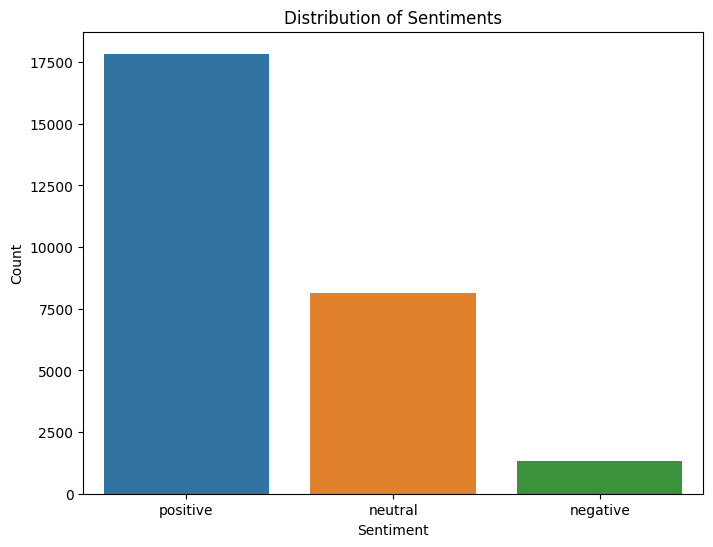

In [ ]:
# создаем объекты для графика
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, ax=ax)

# задаем названия осей и графика
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sentiments')

plt.show()

In [ ]:
# Импортируем библиотеку и скачиваем стоп слова для русского языка
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Создаем список стоп-слов на русском языке
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

Смотрим частоту всех слов: строим гистограмму распределения частоты слов

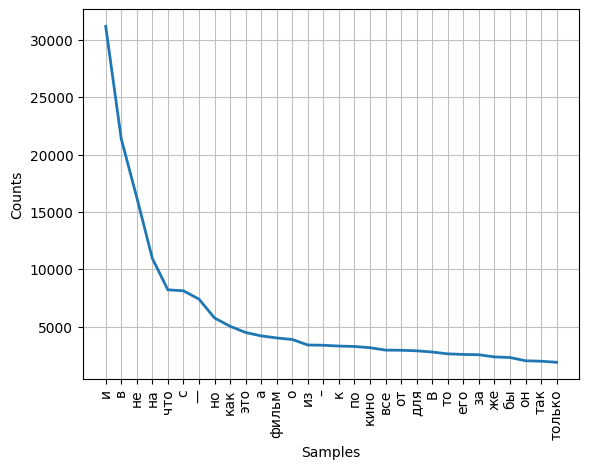

In [ ]:
# создаем список всех слов в наших текстах
all_words = []
for text in df['review']:
    all_words.extend(text.split())

# создаем объект FreqDist и вычисляем частоту каждого слова
fdist = FreqDist(all_words)

# выводим 30 наиболее часто встречающихся слов
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
# Удаляем стоп слова, используя анонимную функцию
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

Проверяем удалился ли шум: строим повторно гистограмму распределения частоты слов

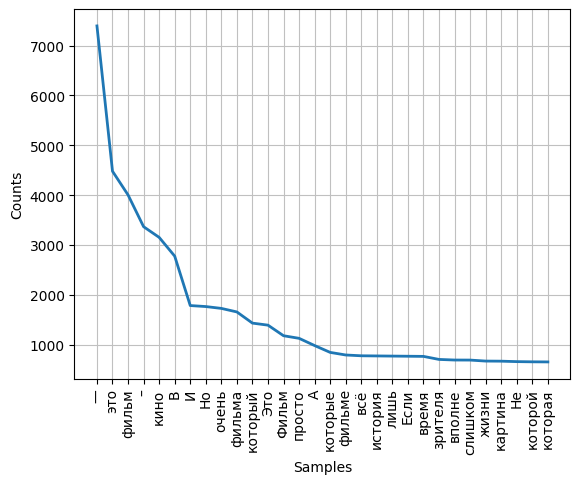

In [ ]:
# создаем список всех слов в наших текстах
all_words = []
for text in df['review']:
    all_words.extend(text.split())

# создаем объект FreqDist и вычисляем частоту каждого слова
fdist = FreqDist(all_words)

# выводим 30 наиболее часто встречающихся слов
fdist.plot(30, cumulative=False)
plt.show()

Преобразовываем текст в векторы признаков, для последующего обучения модели

In [ ]:
# Создаем объект TfidfVectorizer для преобразования текста в векторы признаков
vectorizer = TfidfVectorizer(stop_words=stop_words)

In [ ]:
# Преобразуем текст в векторы признаков
X = vectorizer.fit_transform(df['review'])

In [ ]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.20, random_state=10)

In [ ]:
# Создаем модель машинного обучения - LinearSVC
model = LinearSVC()

In [ ]:
# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
# Получаем предсказания модели на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
# Оцениваем качество модели
acc_svc = accuracy_score(y_test, y_pred)
cm_svc = confusion_matrix(y_test, y_pred)

In [ ]:
# Смотрим точность и матрицу ошибок
print(f'Accuracy: {acc_svc}')
print(f'Confusion matrix: \n{cm_svc}')

Accuracy: 0.6648975109809663
Confusion matrix: 
[[   2   96  194]
 [   3  534 1078]
 [   1  459 3097]]


# 2. Выбираем наилучшую модель обучения

В целом, для задачи анализа тональности текстов наиболее распространенными моделями являются:

1. Логистическая регрессия
2. Наивный Байесовский классификатор
3. Решающие деревья
4. Случайный лес

Поэтому сравним эти модели, и выберем наилучшую, по критерию accuracy

1. Логистическая регрессия.

In [ ]:
# Импортируем модель
from sklearn.linear_model import LogisticRegression

# Создаем объект модели
lr_model = LogisticRegression()

# Обучаем модель на обучающей выборке
lr_model.fit(X_train, y_train)

# Получаем предсказания модели на тестовой выборке
y_pred = lr_model.predict(X_test)

# Оцениваем качество модели
acc_lr = accuracy_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)

# Печатаем точность и матрицу ошибок
print(f'Accuracy: {acc_lr}')
print(f'Confusion matrix: \n{cm_lr}')

Accuracy: 0.6755124450951684
Confusion matrix: 
[[   0   52  240]
 [   0  296 1319]
 [   0  162 3395]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Наивный Байесовский классификатор.

In [ ]:
# Импортируем модель
from sklearn.naive_bayes import MultinomialNB

# Создаем объект модели
nb_model = MultinomialNB()

# Обучаем модель на обучающей выборке
nb_model.fit(X_train, y_train)

# Получаем предсказания модели на тестовой выборке
y_pred = nb_model.predict(X_test)

# Оцениваем качество модели
acc_nb = accuracy_score(y_test, y_pred)
cm_nb = confusion_matrix(y_test, y_pred)

# Печатаем точность и матрицу ошибок
print(f'Accuracy: {acc_nb}')
print(f'Confusion matrix: \n{cm_nb}')

Accuracy: 0.6515373352855052
Confusion matrix: 
[[   0    2  290]
 [   0    4 1611]
 [   0    1 3556]]


3. Решающие деревья.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Создаем модель решающих деревьев
dt_model = DecisionTreeClassifier()

# Обучаем модель на обучающей выборке
dt_model.fit(X_train, y_train)

# Получаем предсказания модели на тестовой выборке
dt_y_pred = dt_model.predict(X_test)

# Оцениваем качество модели
acc_dt = accuracy_score(y_test, dt_y_pred)
cm_dt = confusion_matrix(y_test, dt_y_pred)

# Печатаем точность и матрицу ошибок
print(f'Accuracy: {acc_dt}')
print(f'Confusion matrix: \n{cm_dt}')

Accuracy: 0.5796120058565154
Confusion matrix: 
[[   8   98  186]
 [  44  486 1085]
 [  62  822 2673]]


4. Случайный лес.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Создаем модель случайного леса
rf_model = RandomForestClassifier()

# Обучаем модель на обучающей выборке
rf_model.fit(X_train, y_train)

# Получаем предсказания модели на тестовой выборке
rf_y_pred = rf_model.predict(X_test)

# Оцениваем качество модели
acc_rf = accuracy_score(y_test, rf_y_pred)
cm_rf = confusion_matrix(y_test, rf_y_pred)

# Печатаем точность и матрицу ошибок
print(f'Accuracy: {acc_rf}')
print(f'Confusion matrix: \n{cm_rf}')

Accuracy: 0.6632503660322109
Confusion matrix: 
[[   0   21  271]
 [   0  139 1476]
 [   1   71 3485]]


# 3. Делаем ансамбль из векторной модели и логистической регрессии

In [ ]:
from sklearn.ensemble import VotingClassifier

# Создаем объекты моделей
svc = LinearSVC()
lr = LogisticRegression()

# Создаем ансамбль моделей
ensemble = VotingClassifier(estimators=[('svc', svc), ('lr', lr)], voting='hard')

# Обучаем ансамбль моделей
ensemble.fit(X_train, y_train)

# Получаем предсказания модели на тестовой выборке
y_pred = ensemble.predict(X_test)

# Оцениваем качество модели
acc_an = accuracy_score(y_test, y_pred)
cm_an = confusion_matrix(y_test, y_pred)

# Печатаем точность и матрицу ошибок
print(f'Accuracy: {acc_an}')
print(f'Confusion matrix: \n{cm_an}')

Accuracy: 0.6654465592972182
Confusion matrix: 
[[   2   96  194]
 [   3  541 1071]
 [   1  463 3093]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4. Сравниваем 6 моделей (LinearSVC, логистическая регрессия, наивный Байесовский классификатор, решающие деревья, случайный лес, ансамбль)

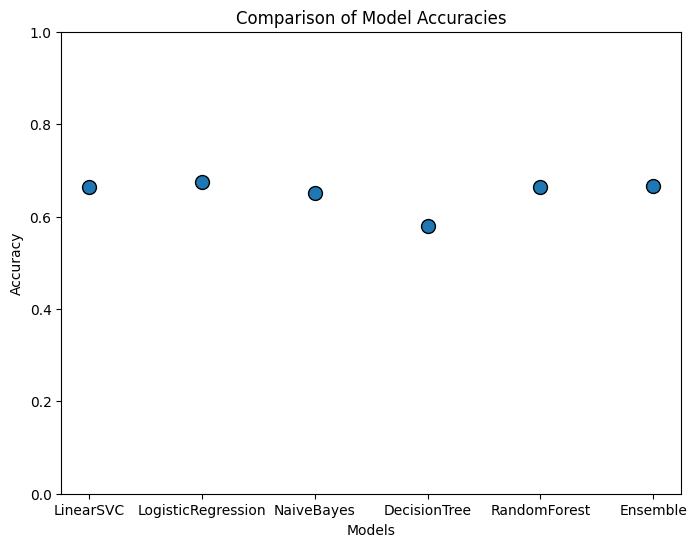

In [ ]:
# Создаем список моделей и их метрики качества
models = ['LinearSVC', 'LogisticRegression', 'NaiveBayes', 'DecisionTree', 'RandomForest', 'Ensemble']
accuracies = [acc_svc, acc_lr, acc_nb, acc_dt, acc_rf, acc_an]

# Строим график
plt.figure(figsize=(8,6))
plt.scatter(models, accuracies, s=100, edgecolors='black')
plt.ylim(0, 1.0)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Делаем вывод о том, что даже ансамбль оказался хуже простой логистической регрессии. Таким образом в дальнейшем будем работать с моделью логистической регрессии.

# 5. Изучаем результаты, чтобы понять, какие слова или фразы наиболее сильно влияют на результаты настроения, чтобы использовать эту информацию для улучшения модели в будущем.

Эти слова и фразы являются наиболее "отрицательными" для предсказания настроения. То есть, когда в тексте встречаются эти слова или фразы, модель склонна отнести текст к более негативному настроению.

Например, слово "подавленные" имеет вес -1.42, что говорит о том, что его наличие в тексте сильнее всего связано с отрицательным настроением. Слово "волшебству" имеет вес -1.29, также указывая на его связь с отрицательным настроением. А слово "настоящую" имеет вес -0.81, что может указывать на то, что его наличие в тексте слабо связано с положительным настроением.

In [ ]:
# Получаем веса признаков
feature_weights = lr_model.coef_[0]

# Получаем словарь признаков
feature_names = vectorizer.vocabulary_

# Сортируем признаки по весу (от меньшего к большему)
features = sorted(zip(feature_weights, feature_names), key=lambda x: x[0])

# Выводим наиболее влиятельные признаки (слова и фразы)
for weight, feature in features[:10]:
    print(f'{feature} ({weight:.2f})')

подавленные (-1.42)
волшебству (-1.29)
николаевич (-1.01)
обществе (-0.91)
невнятные (-0.86)
истекающий (-0.85)
бабушкамдедушкам (-0.84)
дефицит (-0.83)
цветастой (-0.81)
настоящую (-0.81)


Судя по этому списку, некоторые из этих слов, такие как "мечей", "летчик" и "земли", могут относиться к определенным тематическим областям, например, к фильмам о средневековых рыцарях, авиации или к фильмам о природе. Другие слова, такие как "галаприём" и "разгульное", могут быть более уникальными и представлять собой характеристики конкретных фильмов или их элементов.

In [ ]:
# Получаем веса признаков
feature_weights = lr_model.coef_[0]

# Получаем словарь признаков
feature_names = vectorizer.vocabulary_

# Сортируем признаки по весу (от меньшего к большему)
features = sorted(zip(feature_weights, feature_names), key=lambda x: x[0],reverse=True)

# Выводим наиболее влиятельные признаки (слова и фразы)
for weight, feature in features[:10]:
    print(f'{feature} ({weight:.2f})')

мечей (1.46)
галаприём (1.40)
помножены (1.30)
устного (1.29)
летчик (1.25)
помещениях (1.23)
перечитывания (1.20)
разгульное (1.19)
маскировку (1.18)
земли (1.15)


Построим график положительной и отрицательной кореляции весов слов

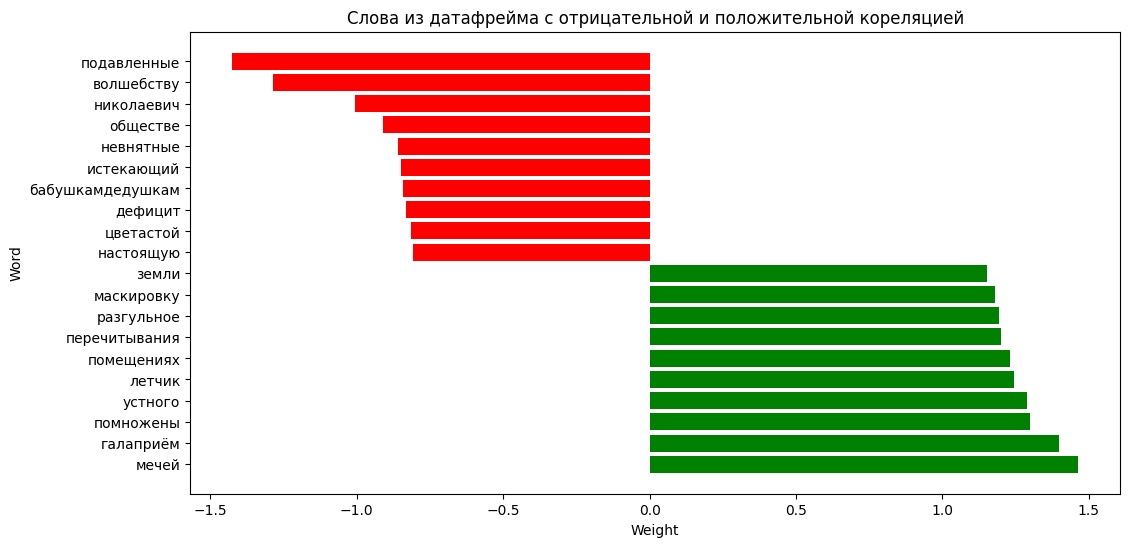

In [ ]:
# Создаем список слов с отрицательной корреляцией
neg_features = sorted(features)[:10]

# Создаем список слов с положительной корреляцией
pos_features = sorted(features)[-10:]

# Создаем списки весов и признаков для отрицательных и положительных слов
neg_weights = [x[0] for x in neg_features]
neg_names = [x[1] for x in neg_features]
pos_weights = [x[0] for x in pos_features]
pos_names = [x[1] for x in pos_features]

# Создаем график
plt.figure(figsize=(12, 6))
plt.barh(neg_names, neg_weights, color='red')
plt.barh(pos_names, pos_weights, color='green')
plt.title('Слова из датафрейма с отрицательной и положительной кореляцией')
plt.xlabel('Weight')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show()

На основе этой информации можно улучшить модель, например, путем добавления новых признаков, связанных с важными словами или фразами, или изменения параметров модели, чтобы учитывать важность определенных признаков.